# (실습) 통계 기초

**참고**

[통계 기초](https://codingalzi.github.io/datapy/from_scratch_2.html)에
정의된 다음 함수들을 활용할 수 있다.

- mean
- median
- quantile
- mode
- data_range
- iqr
- var
- std
- cov
- corrcoef

**필수 모듈**

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [1]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정

In [6]:
import platform
import matplotlib as mpl

# 윈도우 설정
if platform.system() == 'Windows':
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = mpl.font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font)
# 우분투/구글 코랩 설정
elif platform.system() == 'Linux':
    # 우분투/구글코랩의 경우 아래 명령문이 최소 한번 실행되어야 함
    !sudo apt-get install -y fonts-nanum*
    !fc-cache -fv

    font = "NanumBarunGothic"
    if not any(map(lambda ft: ft.name == font, mpl.font_manager.fontManager.ttflist)):
        mpl.font_manager.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=font)
    plt.rc("axes", unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

## 데이터 준비

영산강에 설치된 승천보에서 측정한 두 개의 데이터셋이다.

- `chl_a`: 녹조 발생의 주요 요인인 클로로필-A의 수치 100개
- `flow`: 보에서 방출되는 시간당 방류량 수치 100개

두 데이터셋의 인덱스는 수질(water quality)을 가리키며,
높은 숫자일 수록 수질은 나쁘다.

In [7]:
# 클로로필-A 수치 100개

chl_a = [51, 51, 53, 53, 54, 55, 57, 57, 59, 60,
         61, 62, 63, 64, 65, 66, 67, 67, 67, 69,
         70, 71, 71, 72, 73, 75, 75, 76, 77, 79,
         81, 81, 83, 83, 85, 86, 87, 88, 88, 88,
         89, 89, 90, 91, 92, 95, 96, 96, 97, 98,
         98, 98, 99, 101, 101, 102, 102, 103, 104, 104,
         104, 104, 105, 106, 107, 108, 110, 111, 111, 112,
         112, 112, 113, 114, 114, 116, 116, 116, 117, 118,
         118, 118, 118, 119, 120, 120, 121, 122, 125, 120,
         121, 121, 121, 122, 122, 122, 122, 124, 125, 124]

In [8]:
# 시간당 방류량 수치 100개

flow = [25, 25, 24, 24, 22, 22, 21, 21, 20, 20,
        19, 19, 19, 18, 18, 18, 17, 17, 17, 16,
        16, 16, 17, 16, 17, 17, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 15, 15, 15, 15, 15,
        15, 14, 15, 14, 14, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 12, 12, 12, 12,
        12, 12, 52, 11, 11, 11, 11, 11, 12, 12,
        12, 12, 12, 11, 12, 12, 12, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 10,
        9, 9, 9, 9, 9, 9, 9, 49, 9, 9]

**문제**

각각의 데이터셋 크기가 100임을 확인하라.

힌트: `len()` 함수

In [10]:
print(len(chl_a))
print(len(flow))

100
100


**문제**

가장 높은 클로로필-A의 수치는 얼마인가?

In [18]:
max(chl_a)
min(chl_a)

51

**문제**

가장 낮은 시간당 방류량 수치는 얼마인가?

In [12]:
min(flow)

9

## 데이터 살펴보기

**문제**

클로로필-A 데이터에 포함된 값들의 빈도를 막대그래프로 그려라.

힌트: `from collections import Counter`

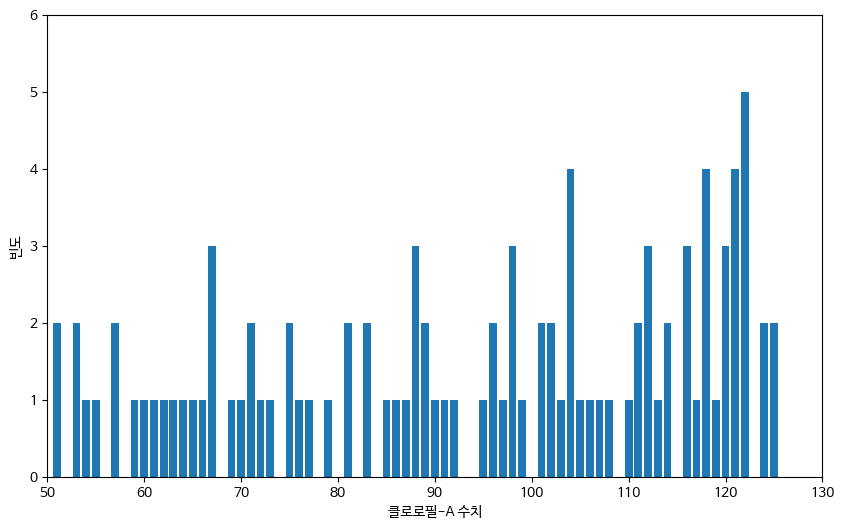

In [19]:
from collections import Counter

a = Counter(chl_a)
a
x = list(a.keys())
y = list(a.values())

plt.bar(x, y)
plt.axis([50, 130, 0, 6])
plt.xlabel("클로로필-A 수치")
plt.ylabel("빈도")
plt.show()

## 중심 경향성과 평균

**문제**

방류량의 평균값을 계산하라.

In [36]:
def mean(xs):
  return sum(xs) / len(xs)
mean(flow)

14.93

**문제**

방류량의 중앙값을 계산하라.

In [37]:
# 리스트의 길이가 짝수일 때
def _median_even(xs):
    sorted_xs = sorted(xs)
    high_midpoint = len(xs) // 2
    mean_value = (sorted_xs[high_midpoint - 1] + sorted_xs[high_midpoint]) / 2
    return mean_value

# 리스트의 길이가 홀수일 때
def _median_odd(xs):
    sorted_xs = sorted(xs)
    midpoint = len(xs) // 2
    mean_value = sorted_xs[midpoint]
    return mean_value

# 짝수/홀수 구분
def median(xs):
    if len(xs) % 2 == 0:
        return _median_even(xs)
    else:
        return _median_odd(xs)

median(flow)

13.0

**문제**

방류량의 최빈값을 계산하라.

In [33]:
def mode(data):
    counts = Counter(data)
    max_count = max(counts.values())
    modes = {x_i for x_i, count in counts.items() if count == max_count}
    return modes

mode(flow)

{11}

**문제**

방류량의 제1, 제3 사분위수를 계산하라.

In [32]:
def quantile(xs, p):
    """
    xs: 데이터셋
    p: 하위 p% 위치
    """

    xs_sorted = sorted(xs) # 정렬
    p_index = int(p * len(xs)) # p%에 해당하는 인덱스

    return xs_sorted[p_index]

print("1사분위수: ", quantile(flow, 0.25))
print("3사분위수: ", quantile(flow, 0.75))

1사분위수:  11
3사분위수:  16


## 산포도와 분산

**문제**

클로로필-A 데이터의 범위를 계산하라.

In [34]:
def data_range(xs):
    return max(xs) - min(xs)

data_range(chl_a)

74

**문제**

클로로필-A 데이터의 분산을 계산하라.

In [38]:
# 벡터 내적 함수
def dotV(v, w):
    assert len(v) == len(w), "벡터들의 길이가 동일해야 함"""

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def dev_mean(xs):
    """평균값과의 차이 계산"""
    mu = mean(xs)
    return [x - mu for x in xs]

def sum_of_squares(v):
    """반환값: v_1 * v_1 + ... + v_n * v_n"""
    return dotV(v, v)

def var(xs):
    """
    분산값 계산. 단, 2개 이상의 데이터가 있어야 함.
    """

    assert len(xs) >= 2, "두 개 이상의 데이터 필요"

    n = len(xs)
    deviations = dev_mean(xs)
    deviation_sum = sum_of_squares(deviations)
    return deviation_sum / (n - 1)

var(chl_a)

511.9195959595961

**문제**

클로로필-A 데이터의 표준편차를 계산하라.

In [39]:
import math

def std(xs):
    return math.sqrt(var(xs))

std(chl_a)

22.62564023314249

## 선형 상관관계

**문제**

클로로필-A와 시간당 방류량 사이의 공분산을 계산하고
두 데이터 사이의 상관관계를 설명하라.

In [41]:
def cov(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    return dotV(dev_mean(xs), dev_mean(ys)) / (len(xs) - 1)

if cov(chl_a, flow) > 0:
    print("양의 상관관계")
elif cov(chl_a, flow) < 0:
    print("음의 상관관계")
else:
    print("0의 상관관계")
print(cov(chl_a, flow))


음의 상관관계
-66.88868686868692


**문제**

클로로필-A와 시간당 방류량 사이의 피어슨 상관계수를 계산하고
두 데이터 사이의 선형 상관관계를 설명하라.

In [42]:
def corrcoef(xs, ys):
    assert len(xs) == len(ys), "xs와 ys의 길이가 같아야 함."

    stdev_x = std(xs) # xs의 표준편차
    stdev_y = std(ys) # ys의 표준편차

    if stdev_x > 0 and stdev_y > 0:
        return cov(xs, ys) / (stdev_x * stdev_y)
    else:
        return 0

corrcoef(chl_a, flow)

-0.46344389682687775

## 이상치

**산점도**

x축을 방류량, y축을 클로로필-A 수치로 지정한 다음 산점도를 그려보자.

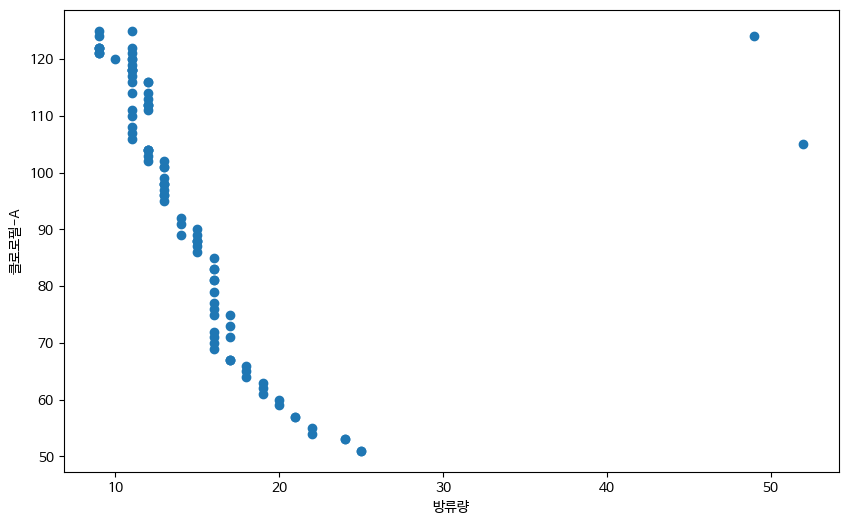

In [53]:
plt.scatter(flow, chl_a)

# 그래프 설정
plt.xlabel("방류량")           # x축 눈금 설명
plt.ylabel("클로로필-A")       # y축 눈금 설명
plt.show()

**문제**

위 산점도에 따르면 두 개의 이상치가 존재한다.
어떤 데이터가 이상치인지 설명하라.

**문제**

클로로필-A 데이터와 방수량 두 데이터셋 모두에서
이상치에 해당하는 두 개의 값을 제거한다.

In [59]:
# None을 적절한 표현식으로 대체할 것.
outlier_chl_a = chl_a.index(125)
new_chl_a = [x for i, x in enumerate(chl_a) if i != outlier_chl_a]
print(new_chl_a)

[51, 51, 53, 53, 54, 55, 57, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 67, 67, 69, 70, 71, 71, 72, 73, 75, 75, 76, 77, 79, 81, 81, 83, 83, 85, 86, 87, 88, 88, 88, 89, 89, 90, 91, 92, 95, 96, 96, 97, 98, 98, 98, 99, 101, 101, 102, 102, 103, 104, 104, 104, 104, 105, 106, 107, 108, 110, 111, 111, 112, 112, 112, 113, 114, 114, 116, 116, 116, 117, 118, 118, 118, 118, 119, 120, 120, 121, 122, 120, 121, 121, 121, 122, 122, 122, 122, 124, 125, 124]


In [56]:
# None을 적절한 표현식으로 대체할 것.
outlier_flow = flow.index(52)
new_flow = [x for i, x in enumerate(chl_a) if i != outlier_flow]

이상치를 제거한 두 데이터셋을 이용하여 산점도를 다시 그려라.

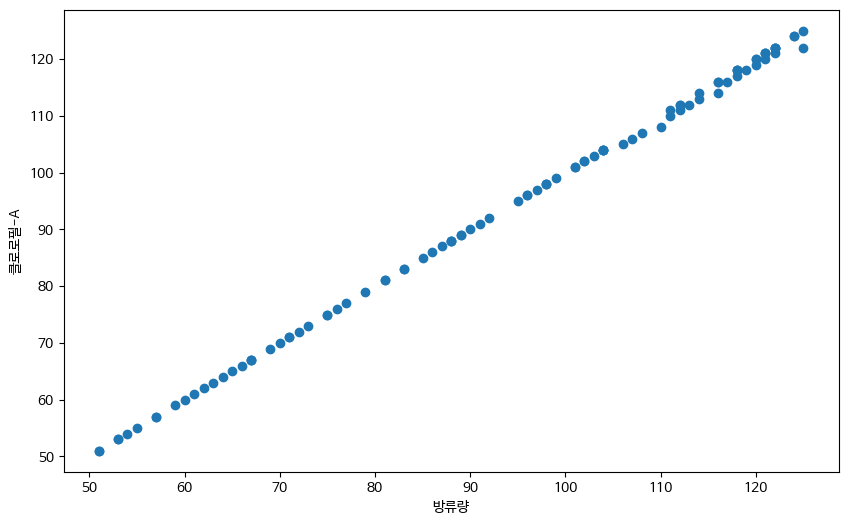

In [57]:
plt.scatter(new_flow, new_chl_a)

# 그래프 설정
plt.xlabel("방류량")           # x축 눈금 설명
plt.ylabel("클로로필-A")       # y축 눈금 설명
plt.show()

**문제**

이상치를 제거하기 이전과 이후의 데이터셋을 이용하여 아래 값들이 어떻게 달라졌는지 설명하라.

- 평균값, 중앙값, 최빈값
- 범위, 사분범위, 분산, 표준편차
- 공분산, 피어슨 상관계수

mean(new_

In [58]:
print('평균값: ', mean(new_chl_a))
print('중앙값: ', median(new_chl_a))
print('최빈값: ',mode(new_chl_a))

print('1사분위수: ',quantile(new_chl_a, 0.25))
print('3사분위수: ',quantile(new_chl_a, 0.75))

print('범위: ',data_range(new_chl_a))
print('분산: ',var(new_chl_a))
print('표준편차: ',std(new_chl_a))

print('공분산: ',cov(new_chl_a, new_flow))
print('피어슨 상관계수: ',corrcoef(new_chl_a, new_flow))

평균값:  93.54545454545455
중앙값:  98
최빈값:  {122}
1사분위수:  73
3사분위수:  114
범위:  74
분산:  507.148423005566
표준편차:  22.51995610576464
공분산:  511.37384044526897
피어슨 상관계수:  0.9997773498859196
